# Exercises on Natural Language Processing with Recurrent Neural Networks

## Exercise 2

In [1]:
!nvidia-smi

Tue Mar  5 18:45:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.13                 Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P0              23W / 105W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Data reading and processing

When reading the file, we ignore SYM and PART tags as they are not included in all 3 sets (train, dev and test), to be able to better evaluate our data. We also ignore _ because i doesn't describe any Tag (X is used for other class).

In [3]:
def read_conllu(file_path):
    df = pd.DataFrame(columns=['Sentence', 'POS_Tags'])
    Pos_Tags = ''
    sentence = ''

    with open(file_path, 'r', encoding='utf-8') as file:
        i = -1
        for line in file:
            line = line.strip()
            if line == '':
                if (sentence != ''):
                    sentence = sentence.lstrip()
                    Pos_Tags = Pos_Tags.lstrip()
                    new_row = {'Sentence': sentence, 'POS_Tags': Pos_Tags}
                    df = df.append(new_row, ignore_index=True)
                    Pos_Tags = ''
                    sentence = ''
            elif line.startswith('#'):
                continue
            else:
                tokens = line.split('\t')
                word = tokens[1]
                POS_tag = tokens[3]
                if (POS_tag != "SYM" and POS_tag != "PART" and POS_tag != "_"):
                    sentence = sentence + " " + word
                    Pos_Tags = Pos_Tags + " " + POS_tag
    return df

In [4]:
train_df = read_conllu("data/UD_Italian-VIT-master/it_vit-ud-train.conllu")
train_df

,Sentence,POS_Tags
0,Le infrastrutture come fattore di competitivit...,DET NOUN ADP NOUN ADP NOUN ADP PROPN PROPN PUNCT
1,In gli ultimi anni la dinamica di i polo di at...,ADP DET ADJ NOUN DET NOUN ADP DET NOUN ADP NOU...
2,Il raggiungimento e il mantenimento di posizio...,DET NOUN CCONJ DET NOUN ADP NOUN ADJ AUX ADV A...
3,Quest' ultimo è funzione di variabili struttur...,DET ADJ AUX NOUN ADP NOUN ADJ ADP PRON DET NOU...
4,"Il contesto milanese , se da un lato è stato t...",DET NOUN ADJ PUNCT SCONJ ADP DET NOUN AUX AUX ...
...,...,...
8272,Premio Elsa Morante .,NOUN PROPN PROPN PUNCT
8273,È nato il premio Elsa Morante che verrà assegn...,AUX VERB DET NOUN PROPN PROPN PRON AUX VERB DE...
8274,Questo Premio che non avrà sede fissa né statu...,DET PROPN PRON ADV VERB NOUN ADJ ADV NOUN ADV ...
8275,sono promotori di l' iniziativa Patrizia Caval...,AUX NOUN ADP DET NOUN PROPN PROPN PUNCT PROPN ...


In [5]:
test_df = read_conllu("data/UD_Italian-VIT-master/it_vit-ud-test.conllu")
test_df

,Sentence,POS_Tags
0,Non sono consentite assegnazioni provvisorie i...,ADV AUX VERB NOUN ADJ ADP DET NOUN ADP DET NOU...
1,È consentita inoltre la partecipazione provvis...,AUX VERB ADV DET NOUN ADJ ADV ADP DET ADJ NOUN...
2,I predetti motivi devono costituire oggetto di...,DET ADJ NOUN AUX VERB NOUN ADP NOUN PUNCT PRON...
3,In caso di ricongiungimento a il familiare des...,ADP NOUN ADP NOUN ADP DET NOUN VERB ADP ADJ NO...
4,A i fini di la possibilità di presentazione di...,ADP DET NOUN ADP DET NOUN ADP NOUN ADP DET NOU...
...,...,...
1062,Scrooge era il suo unico esecutore testamentar...,PROPN AUX DET DET ADJ NOUN ADJ PUNCT ADJ NOUN ...
1063,"Anzi il nostro Scrooge , che per verità il tri...",CCONJ DET DET PROPN PUNCT PRON ADP NOUN DET AD...
1064,Il ricordo di i funerali mi fa tornare a il pu...,DET NOUN ADP DET NOUN PRON VERB VERB ADP DET N...
1065,Non c' è dunque dubbio che Marley era morto .,ADV PRON AUX ADV NOUN SCONJ PROPN AUX VERB PUNCT


In [6]:
dev_df = read_conllu("data/UD_Italian-VIT-master/it_vit-ud-dev.conllu")
dev_df

,Sentence,POS_Tags
0,"Ha l' acqua calda , più o meno si veste .",VERB DET NOUN ADJ PUNCT ADV CCONJ ADV PRON VER...
1,malgrado le guerre e i disastri naturali e pol...,ADP DET NOUN CCONJ DET NOUN ADJ CCONJ ADJ PUNC...
2,È come un' energia che sta crescendo complessi...,AUX ADP NUM NOUN PRON AUX VERB ADV PUNCT PUNCT
3,"L' onorevole Charles Rose , deputato democrati...",DET NOUN PROPN PROPN PUNCT NOUN ADJ ADP DET PR...
4,"Da qualche tempo , la sua espressione preferit...",ADP DET ADV PUNCT DET DET NOUN ADJ AUX VERB PUNCT
...,...,...
738,Le gravi esigenze di salute di l' aspirante a ...,DET ADJ NOUN ADP NOUN ADP DET NOUN ADP DET NOU...
739,"Possono chiedere l' assegnazione provvisoria ,...",AUX VERB DET NOUN ADJ PUNCT ADV ADP DET NOUN A...
740,La relativa domanda va formulata contestualmen...,DET ADJ NOUN AUX VERB ADV ADP PRON ADP NOUN PU...
741,Possono partecipare a il movimento di le asseg...,AUX VERB ADP DET NOUN ADP DET NOUN ADJ ADV DET...


Below we calculate an upper boundary of the sentence length, to deside the size of the padding of our data. We don't use max size, as the larger sentences have too many words.

In [7]:
def calculate_word_upper_boundary(df, column_name):
   
    df['Sentence_Length'] = df[column_name].apply(lambda x: len(x.split()))
    Q1 = df['Sentence_Length'].quantile(0.25)
    Q3 = df['Sentence_Length'].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR

    return upper_boundary

In [8]:
upper_boundary = calculate_word_upper_boundary(train_df, 'Sentence')

# Display the result
print("Upper Boundary for Words in a Sentence:", upper_boundary)

Upper Boundary for Words in a Sentence: 73.0


We drop any sentence larger than the boundary

In [9]:
train_df['Sentence_Length'] = train_df['Sentence'].apply(lambda x: len(x.split()))
train_df = train_df[train_df['Sentence_Length'] <= 80]
test_df['Sentence_Length'] = test_df['Sentence'].apply(lambda x: len(x.split()))
test_df = test_df[test_df['Sentence_Length'] <= 80]
dev_df['Sentence_Length'] = dev_df['Sentence'].apply(lambda x: len(x.split()))
dev_df = dev_df[dev_df['Sentence_Length'] <= 80]
train_df.drop(axis=1,columns = ['Sentence_Length'], inplace = True)
test_df.drop(axis=1,columns = ['Sentence_Length'], inplace = True)
dev_df.drop(axis=1,columns = ['Sentence_Length'], inplace = True)

In [10]:
train_df

,Sentence,POS_Tags
0,Le infrastrutture come fattore di competitivit...,DET NOUN ADP NOUN ADP NOUN ADP PROPN PROPN PUNCT
1,In gli ultimi anni la dinamica di i polo di at...,ADP DET ADJ NOUN DET NOUN ADP DET NOUN ADP NOU...
2,Il raggiungimento e il mantenimento di posizio...,DET NOUN CCONJ DET NOUN ADP NOUN ADJ AUX ADV A...
4,"Il contesto milanese , se da un lato è stato t...",DET NOUN ADJ PUNCT SCONJ ADP DET NOUN AUX AUX ...
5,"In particolare , la dotazione infrastrutturale...",ADP NOUN PUNCT DET NOUN ADJ ADP DET NOUN VERB ...
...,...,...
8272,Premio Elsa Morante .,NOUN PROPN PROPN PUNCT
8273,È nato il premio Elsa Morante che verrà assegn...,AUX VERB DET NOUN PROPN PROPN PRON AUX VERB DE...
8274,Questo Premio che non avrà sede fissa né statu...,DET PROPN PRON ADV VERB NOUN ADJ ADV NOUN ADV ...
8275,sono promotori di l' iniziativa Patrizia Caval...,AUX NOUN ADP DET NOUN PROPN PROPN PUNCT PROPN ...


In [11]:
test_df

,Sentence,POS_Tags
0,Non sono consentite assegnazioni provvisorie i...,ADV AUX VERB NOUN ADJ ADP DET NOUN ADP DET NOU...
2,I predetti motivi devono costituire oggetto di...,DET ADJ NOUN AUX VERB NOUN ADP NOUN PUNCT PRON...
3,In caso di ricongiungimento a il familiare des...,ADP NOUN ADP NOUN ADP DET NOUN VERB ADP ADJ NO...
4,A i fini di la possibilità di presentazione di...,ADP DET NOUN ADP DET NOUN ADP NOUN ADP DET NOU...
5,Possono altresì chiedere l' assegnazione provv...,AUX ADV VERB DET NOUN ADJ DET NOUN VERB ADP NO...
...,...,...
1062,Scrooge era il suo unico esecutore testamentar...,PROPN AUX DET DET ADJ NOUN ADJ PUNCT ADJ NOUN ...
1063,"Anzi il nostro Scrooge , che per verità il tri...",CCONJ DET DET PROPN PUNCT PRON ADP NOUN DET AD...
1064,Il ricordo di i funerali mi fa tornare a il pu...,DET NOUN ADP DET NOUN PRON VERB VERB ADP DET N...
1065,Non c' è dunque dubbio che Marley era morto .,ADV PRON AUX ADV NOUN SCONJ PROPN AUX VERB PUNCT


In [12]:
dev_df

,Sentence,POS_Tags
0,"Ha l' acqua calda , più o meno si veste .",VERB DET NOUN ADJ PUNCT ADV CCONJ ADV PRON VER...
1,malgrado le guerre e i disastri naturali e pol...,ADP DET NOUN CCONJ DET NOUN ADJ CCONJ ADJ PUNC...
2,È come un' energia che sta crescendo complessi...,AUX ADP NUM NOUN PRON AUX VERB ADV PUNCT PUNCT
3,"L' onorevole Charles Rose , deputato democrati...",DET NOUN PROPN PROPN PUNCT NOUN ADJ ADP DET PR...
4,"Da qualche tempo , la sua espressione preferit...",ADP DET ADV PUNCT DET DET NOUN ADJ AUX VERB PUNCT
...,...,...
738,Le gravi esigenze di salute di l' aspirante a ...,DET ADJ NOUN ADP NOUN ADP DET NOUN ADP DET NOU...
739,"Possono chiedere l' assegnazione provvisoria ,...",AUX VERB DET NOUN ADJ PUNCT ADV ADP DET NOUN A...
740,La relativa domanda va formulata contestualmen...,DET ADJ NOUN AUX VERB ADV ADP PRON ADP NOUN PU...
741,Possono partecipare a il movimento di le asseg...,AUX VERB ADP DET NOUN ADP DET NOUN ADJ ADV DET...


We tokenize and encode our data. After we use padding on the sentences to all have the same size.

In [13]:
X_train = train_df['Sentence'].apply(lambda x: x.split()).tolist()
y_train = train_df['POS_Tags'].apply(lambda x: x.split()).tolist()
X_test = test_df['Sentence'].apply(lambda x: x.split()).tolist()
y_test = test_df['POS_Tags'].apply(lambda x: x.split()).tolist()
X_dev = dev_df['Sentence'].apply(lambda x: x.split()).tolist()
y_dev = dev_df['POS_Tags'].apply(lambda x: x.split()).tolist()

In [14]:
unique_elements = set(element for sublist in y_train for element in sublist)
unique_elements_list = list(unique_elements)
print("Unique Elements:", unique_elements_list)

Unique Elements: ['PROPN', 'VERB', 'ADJ', 'PRON', 'CCONJ', 'INTJ', 'NUM', 'AUX', 'NOUN', 'ADP', 'PUNCT', 'X', 'SCONJ', 'ADV', 'DET']


In [15]:
unique_elements = set(element for sublist in y_dev for element in sublist)
unique_elements_list = list(unique_elements)
print("Unique Elements:", unique_elements_list)

Unique Elements: ['PROPN', 'VERB', 'ADJ', 'CCONJ', 'PRON', 'INTJ', 'NUM', 'AUX', 'NOUN', 'ADP', 'PUNCT', 'X', 'SCONJ', 'ADV', 'DET']


In [16]:
print('sample X_train: ', X_train[0], '\n')
print('sample y_train: ', y_train[0], '\n')

sample X_train:  ['Le', 'infrastrutture', 'come', 'fattore', 'di', 'competitività', 'di', 'Angela', 'Airoldi', '.'] 

sample y_train:  ['DET', 'NOUN', 'ADP', 'NOUN', 'ADP', 'NOUN', 'ADP', 'PROPN', 'PROPN', 'PUNCT'] 



In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

# encode X
word_tokenizer = Tokenizer(oov_token='__UNK__')              # instantiate tokeniser
word_tokenizer.fit_on_texts(X_train)            # fit tokeniser on data
# use the tokeniser to encode input sequence
X_train_encoded = word_tokenizer.texts_to_sequences(X_train)
X_test_encoded = word_tokenizer.texts_to_sequences(X_test)
X_dev_encoded = word_tokenizer.texts_to_sequences(X_dev)
# encode Y
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(y_train)
y_train_encoded = tag_tokenizer.texts_to_sequences(y_train)
y_test_encoded = tag_tokenizer.texts_to_sequences(y_test)
y_dev_encoded = tag_tokenizer.texts_to_sequences(y_dev)
# look at first encoded data point
print("** Raw data point **", "\n", "-"*100, "\n")
print('X: ', X_train[0], '\n')
print('Y: ', y_train[0], '\n')
print()
print("** Encoded data point **", "\n", "-"*100, "\n")
print('X: ', X_train_encoded[0], '\n')
print('Y: ', y_train_encoded[0], '\n')


** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['Le', 'infrastrutture', 'come', 'fattore', 'di', 'competitività', 'di', 'Angela', 'Airoldi', '.'] 

Y:  ['DET', 'NOUN', 'ADP', 'NOUN', 'ADP', 'NOUN', 'ADP', 'PROPN', 'PROPN', 'PUNCT'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [12, 1835, 36, 3660, 2, 2801, 2, 10163, 10164, 5] 

Y:  [3, 1, 2, 1, 2, 1, 2, 7, 7, 4] 



In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQ_LENGTH = 80
X_train_padded = pad_sequences(X_train_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
y_train_padded = pad_sequences(y_train_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
X_test_padded = pad_sequences(X_test_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
y_test_padded = pad_sequences(y_test_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
X_dev_padded = pad_sequences(X_dev_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
y_dev_padded = pad_sequences(y_dev_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
# print the first sequence
print(X_train_padded[0], "\n"*3)
print(y_train_padded[0])

[   12  1835    36  3660     2  2801     2 10163 10164     5     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0] 



[3 1 2 1 2 1 2 7 7 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


We use fasttext pretrained embedding to create the embedding matrix of the words of our vocabulary.

In [19]:
import fasttext.util
fasttext.util.download_model('it', if_exists='ignore')  # Italian
ft = fasttext.load_model('cc.it.300.bin')

KeyboardInterrupt: 

In [ ]:
import numpy as np

EMBEDDING_SIZE  = 300  
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))
word2id = word_tokenizer.word_index
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = ft[word]
    except KeyError:
        pass

In [ ]:
embedding_weights.shape[1]

In [ ]:
embedding_weights.shape[0]

In [ ]:
from tensorflow.keras.utils import to_categorical

max_class_index = np.max(y_train_padded)

# Convert non-zero elements to categorical
num_classes = max_class_index +1
y_train = to_categorical(y_train_padded, num_classes=num_classes)
y_test = to_categorical(y_test_padded, num_classes=num_classes)
y_dev = to_categorical(y_dev_padded, num_classes=num_classes)

In [ ]:
y_train

In [25]:
dict_match = {}
for i in range(8158):
    for j in range(len(train_df.iloc[i,1].split())):
        dict_match[train_df.iloc[i,1].split()[j]] = y_train[i,j]
    
modified_dict = {key: np.argmax(value,-1) for key, value in dict_match.items()}

def create_reverse_dict(dictionary):
    reverse_dict = {v: k for k, v in dictionary.items()}
    return reverse_dict

modified_dict_1 = create_reverse_dict(modified_dict)
modified_dict_1

{3: 'DET',
 1: 'NOUN',
 2: 'ADP',
 7: 'PROPN',
 4: 'PUNCT',
 6: 'ADJ',
 9: 'AUX',
 8: 'ADV',
 5: 'VERB',
 10: 'PRON',
 11: 'CCONJ',
 13: 'SCONJ',
 12: 'NUM',
 14: 'X',
 15: 'INTJ'}

We 1-hot encode the categories of our y sets

In [26]:
NUM_CLASSES = y_train.shape[2]

In [27]:
NUM_CLASSES

16

## Hyperparameter Tuning

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense, GRU, Dropout

def build_model(hp):
    
    model = Sequential()
    model.add(Embedding(input_dim = VOCABULARY_SIZE,
     output_dim = EMBEDDING_SIZE,
     input_length = MAX_SEQ_LENGTH,
     weights = [embedding_weights],
     trainable = False))
    
    rnn_layer = hp.Choice('rnn_layer', values=['lstm', 'gru'])
    
    for i in range(hp.Int(name='num_layers',min_value=1,max_value=2)):
        if rnn_layer == 'lstm':
            model.add(Bidirectional(LSTM(units=hp.Int('units_'+str(i), min_value=64, max_value=512, step=64), return_sequences=True, recurrent_dropout = 0.33)))
            model.add(Dropout(hp.Choice(name='dropout_layer_'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))
        else:
            model.add(Bidirectional(GRU(units=hp.Int('units_'+str(i), min_value=64, max_value=512, step=64), return_sequences=True, recurrent_dropout = 0.33)))
            model.add(Dropout(hp.Choice(name='dropout_layer_'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))

    model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
    
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=hp_learning_rate),
              metrics=['acc'])

    return model

In [45]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


tuner = kt.RandomSearch(build_model,
                        objective=kt.Objective('val_acc',
                                               direction='max'),
                        max_trials=20,
                        directory='KT_directory',
                        project_name='KT_tuning')
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10)
tuner.search_space_summary()

Search space summary
Default search space size: 5
rnn_layer (Choice)
{'default': 'lstm', 'conditions': [], 'values': ['lstm', 'gru'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
dropout_layer_0 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train_padded, y_train,
             validation_data=(X_dev_padded, y_dev), epochs=50, batch_size = 64,
             callbacks=[early_stopping])

In [47]:
tuner.results_summary()

Results summary
Results in KT_directory\KT_tuning
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 02 summary
Hyperparameters:
rnn_layer: gru
num_layers: 2
units_0: 128
dropout_layer_0: 0.5
learning_rate: 0.001
units_1: 320
dropout_layer_1: 0.5
Score: 0.9785242080688477

Trial 05 summary
Hyperparameters:
rnn_layer: gru
num_layers: 2
units_0: 384
dropout_layer_0: 0.5
learning_rate: 0.001
units_1: 128
dropout_layer_1: 0.1
Score: 0.977826714515686

Trial 06 summary
Hyperparameters:
rnn_layer: gru
num_layers: 1
units_0: 384
dropout_layer_0: 0.3
learning_rate: 0.001
units_1: 128
dropout_layer_1: 0.2
Score: 0.9774779677391052

Trial 08 summary
Hyperparameters:
rnn_layer: gru
num_layers: 1
units_0: 128
dropout_layer_0: 0.1
learning_rate: 0.001
units_1: 256
dropout_layer_1: 0.4
Score: 0.9771108627319336

Trial 10 summary
Hyperparameters:
rnn_layer: gru
num_layers: 2
units_0: 448
dropout_layer_0: 0.2
learning_rate: 0.001
units_1: 192
dropout_layer_1: 0.1
Score: 0.9770557

## Bidirectional GRU RNN Training

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, TimeDistributed, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

bidirect_model = Sequential()
bidirect_model.add(Embedding(input_dim = VOCABULARY_SIZE,
 output_dim = EMBEDDING_SIZE,
 input_length = MAX_SEQ_LENGTH,
 weights = [embedding_weights],
 trainable = False
))
bidirect_model.add(Bidirectional(GRU(128, return_sequences=True, recurrent_dropout = 0.33)))
bidirect_model.add(Dropout(0.5))
bidirect_model.add(Bidirectional(GRU(320, return_sequences=True, recurrent_dropout = 0.33)))
bidirect_model.add(Dropout(0.5))
bidirect_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
#compile model
bidirect_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['acc'])
# check summary of model
bidirect_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 300)           6175200   
                                                                 
 bidirectional_2 (Bidirecti  (None, 80, 256)           330240    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 80, 256)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 80, 640)           1109760   
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 80, 640)           0         
                                                                 
 time_distributed (TimeDist  (None, 80, 16)           

In [31]:
import time
import os
from tensorflow.keras.callbacks import ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss', patience=10)

bidirect_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
    )
if not os.path.exists('./checkpoints'):
  os.makedirs('./checkpoints')
# Callback to save the Keras model or model weights at some frequency.
checkpoint = ModelCheckpoint(
    'checkpoints/weights.hdf5',
    monitor='val_accuracy',
    mode='max',
    verbose=2,
    save_best_only=True,
    save_weights_only=True
    )
start_training_time = time.time()


history = bidirect_model.fit(
    X_train_padded,
    y_train,
    validation_data=(X_dev_padded, y_dev),
    batch_size=64,
    epochs=50,
    shuffle=True,
    callbacks=[early_stopping, checkpoint]
    )
end_training_time = time.time()

print(f'\nTraining time: {time.strftime("%H:%M:%S", time.gmtime(end_training_time - start_training_time))} \n')

Epoch 1/50


128/128 [==============================] - ETA: 0s - loss: 0.4693 - accuracy: 0.8792
Epoch 1: val_accuracy improved from -inf to 0.92916, saving model to checkpoints\weights.hdf5
128/128 [==============================] - 94s 681ms/step - loss: 0.4693 - accuracy: 0.8792 - val_loss: 0.2296 - val_accuracy: 0.9292
Epoch 2/50
128/128 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9589
Epoch 2: val_accuracy improved from 0.92916 to 0.95638, saving model to checkpoints\weights.hdf5
128/128 [==============================] - 97s 755ms/step - loss: 0.1307 - accuracy: 0.9589 - val_loss: 0.1493 - val_accuracy: 0.9564
Epoch 3/50
128/128 [==============================] - ETA: 0s - loss: 0.0895 - accuracy: 0.9736
Epoch 3: val_accuracy improved from 0.95638 to 0.96812, saving model to checkpoints\weights.hdf5
128/128 [==============================] - 99s 775ms/step - loss: 0.0895 - accuracy: 0.9736 - val_loss: 0.1182 - val_accuracy: 0.9681
Epoch 4/50
128/128 [

128/128 [==============================] - 106s 825ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0801 - val_accuracy: 0.9764
Epoch 27/50
128/128 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9906
Epoch 27: val_accuracy did not improve from 0.97866
128/128 [==============================] - 106s 829ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0778 - val_accuracy: 0.9772
Epoch 28/50
128/128 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9909
Epoch 28: val_accuracy did not improve from 0.97866
128/128 [==============================] - 106s 825ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 29/50
128/128 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9910
Epoch 29: val_accuracy did not improve from 0.97866
128/128 [==============================] - 107s 836ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0776 - val_accuracy: 0.9778
Epoch 30/50
1

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, TimeDistributed, Dense, Dropout

bidirect_model = Sequential()
bidirect_model.add(Embedding(input_dim = VOCABULARY_SIZE,
 output_dim = EMBEDDING_SIZE,
 input_length = MAX_SEQ_LENGTH,
 weights = [embedding_weights],
 trainable = False
))
bidirect_model.add(Bidirectional(GRU(128, return_sequences=True, recurrent_dropout = 0.33)))
bidirect_model.add(Dropout(0.5))
bidirect_model.add(Bidirectional(GRU(320, return_sequences=True, recurrent_dropout = 0.33)))
bidirect_model.add(Dropout(0.5))
bidirect_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))
bidirect_model.load_weights("checkpoints/weights.hdf5")

## Plots and Evaluation

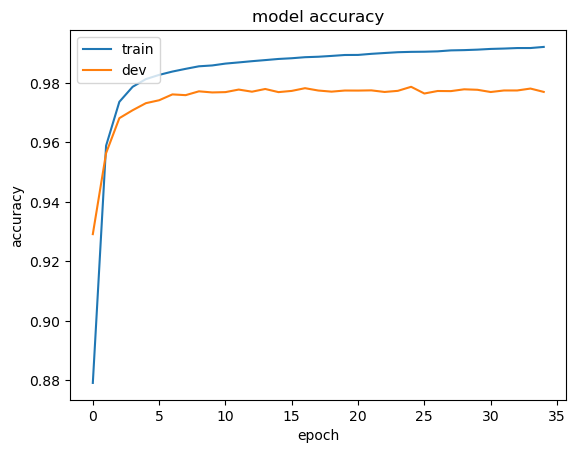

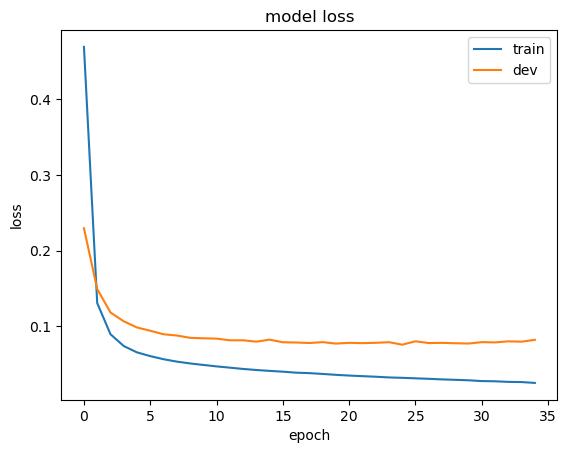

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

In [29]:
from sklearn.metrics import precision_recall_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

def evaluate_model(X, y, model,set_name):
    y_pred_1 = model.predict(X)
    y_pred = np.argmax(y_pred_1, axis=-1)
    y_pred = y_pred.flatten()
    y_true = np.argmax(y, axis=-1)
    y_true = y_true.flatten()
    valid_labels = [label for label in y_true if label != 0]
    valid_predictions = [pred for true, pred in zip(y_true, y_pred) if true != 0]

    print(f"-----------Predection Scores for {set_name}-----------")
    
    # Create a classification report
    report = classification_report(valid_labels, valid_predictions, target_names=[modified_dict_1[i] for i in range(1, 16)])
    print(report)

    
    y_pred_labels = np.argmax(y_pred_1, axis=1)
    precision = dict()
    recall = dict()
    pr_auc = dict()
    max_prob_indices = np.argmax(y_pred_1, axis=2)
    # Create a binary matrix with 1s where the highest probability is and 0s elsewhere
    y_pred_2 = np.zeros_like(y_pred_1)
    for i in range(y_pred_1.shape[0]):
        for j in range(y_pred_1.shape[1]):
            y_pred_2[i, j, max_prob_indices[i, j]] = 1
            
            
    for i in range(1,16):
        precision[i], recall[i], _ = precision_recall_curve(y[:,:,i].flatten(), y_pred_2[:,:,i].flatten())
        pr_auc[i] = auc(recall[i], precision[i])

    # Step 3: Print or use the calculated scores for each class
    for i in range(1,16):
        print(f"Class {modified_dict_1[i]} - AUC-PR: {pr_auc[i]}")

    # Step 4: Calculate macro AUC-PR
    all_recall = np.unique(np.concatenate([recall[i] for i in range(1,16)]))
    mean_precision = np.zeros_like(all_recall)
    for i in range(1,16):
        mean_precision += np.interp(all_recall, recall[i][::-1], precision[i][::-1])
    mean_precision /= num_classes
    macro_pr_auc = auc(all_recall, mean_precision)

    # Step 5: Print or use the calculated macro AUC-PR
    print(f"Macro AUC-PR: {macro_pr_auc}")
    return

In [30]:
test = evaluate_model(X_test_padded, y_test, bidirect_model,"Test Set")

34/34 [==============================] - 3s 57ms/step
-----------Predection Scores for Test Set-----------
              precision    recall  f1-score   support

        NOUN       0.90      0.95      0.92      4813
         ADP       0.99      0.99      0.99      3723
         DET       0.98      0.99      0.99      3776
       PUNCT       1.00      1.00      1.00      3272
        VERB       0.92      0.90      0.91      2229
         ADJ       0.85      0.83      0.84      1496
       PROPN       0.81      0.70      0.75      1249
         ADV       0.92      0.94      0.93      1210
         AUX       0.98      0.97      0.97      1033
        PRON       0.93      0.91      0.92      1225
       CCONJ       0.98      0.92      0.95       750
         NUM       0.81      0.89      0.85       401
       SCONJ       0.83      0.83      0.83       313
           X       0.62      0.23      0.33        44
        INTJ       0.77      0.62      0.69        16

    accuracy               

In [31]:
test = evaluate_model(X_train_padded, y_train, bidirect_model,"Train Set")

255/255 [==============================] - 13s 50ms/step
-----------Predection Scores for Train Set-----------
              precision    recall  f1-score   support

        NOUN       0.97      0.98      0.98     43174
         ADP       1.00      1.00      1.00     33895
         DET       1.00      1.00      1.00     33530
       PUNCT       1.00      1.00      1.00     24499
        VERB       0.97      0.97      0.97     16428
         ADJ       0.93      0.95      0.94     15242
       PROPN       0.97      0.90      0.94      9827
         ADV       0.95      0.96      0.96      8401
         AUX       0.99      0.99      0.99      7260
        PRON       0.97      0.97      0.97      7244
       CCONJ       0.98      0.96      0.97      6315
         NUM       0.98      0.97      0.98      5007
       SCONJ       0.91      0.93      0.92      1671
           X       0.97      0.83      0.90       270
        INTJ       0.91      0.64      0.75        61

    accuracy           

In [32]:
test = evaluate_model(X_dev_padded, y_dev, bidirect_model,"Dev Set")

22/22 [==============================] - 1s 47ms/step
-----------Predection Scores for Dev Set-----------
              precision    recall  f1-score   support

        NOUN       0.95      0.96      0.95      5874
         ADP       1.00      1.00      1.00      4793
         DET       0.99      0.99      0.99      4030
       PUNCT       1.00      1.00      1.00      2073
        VERB       0.89      0.91      0.90      1704
         ADJ       0.87      0.82      0.85      1992
       PROPN       0.54      0.53      0.54       316
         ADV       0.94      0.94      0.94       720
         AUX       0.99      0.99      0.99       768
        PRON       0.95      0.95      0.95       882
       CCONJ       0.96      0.93      0.95       622
         NUM       0.82      0.90      0.86       437
       SCONJ       0.82      0.87      0.85       149
           X       0.76      0.30      0.43        64
        INTJ       0.00      0.00      0.00         2

    accuracy                